<h1 style="background-color: rgba(0, 0, 255, 0.5)">LOGISTIC REGRESSION (multiclass)</h1>

*Train and evaluate logistic regression algorithm in a multiclass classification problem*

In [1]:
# import packages

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
import seaborn as sns
%matplotlib inline


In [2]:
# load data

digits = load_digits()
X = digits.data
Y = digits.target


In [3]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
Y

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
# train and test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
mms = MinMaxScaler()


In [6]:
# scale and transform matrix of features X

X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

Read this article to understand why we use fit_transform() on training dataset and just transform() on test dataset
https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

In [7]:
# train model

lr = LogisticRegression()
lr.fit(X_train, Y_train)

# prediction

Y_pred = lr.predict(X_test)
Y_pred_prob = lr.predict_proba(X_test)


C:\Users\ricca\anaconda3\envs\Machine_learning\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [8]:
# evaluate model

acc = accuracy_score(Y_test, Y_pred)
lloss = log_loss(Y_test, Y_pred_prob)

print("Accuracy = {} ; Log Loss = {}".format(round(acc,2), round(lloss,2)))

Accuracy = 0.96 ; Log Loss = 0.18


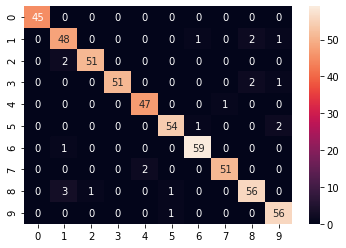

In [9]:
# confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True)


Alternative method using Sklearn method One vs Rest. The results we obtain sgould be the same of the previous case

Accuracy = 0.96 ; Log Loss = 0.23


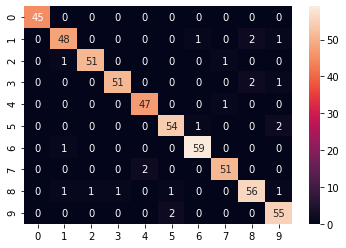

In [13]:
from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(LogisticRegression())

# train model

ovr.fit(X_train, Y_train)

# prediction

Y_pred = ovr.predict(X_test)
Y_pred_prob = ovr.predict_proba(X_test)

# evaluate model

acc = accuracy_score(Y_test, Y_pred)
lloss = log_loss(Y_test, Y_pred_prob)

print("Accuracy = {} ; Log Loss = {}".format(round(acc,2), round(lloss,2)))

# confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True)